In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from statsmodels import regression
from statsmodels.tsa.stattools import coint

dados = pd.read_excel('dados_relatorio.xlsx')[1:]
# data_antigo = pd.read_excel('/home/daniel/Desktop/Projetos/mql_python/todos_diretorios_desenvolvimento_projeto/Relatório 1/dados_relatorio.xlsx')[1:] #linux
# dados = data_antigo.copy()
#dados = pd.read_excel('dados_antigo_copia.xlsx')[1:]

In [2]:
dados

,time,close IBOV,close ABEV3,close AZUL4,close B3SA3,close BBAS3,close BBDC3,close BBDC4,close BBSE3,close BEEF3,...,close TAEE11,close TIMP3,close TOTS3,close UGPA3,close USIM5,close VALE3,close VIVT4,close VVAR3,close WEGE3,close YDUQ3
1,2016-01-22,38031,15.08,NaN,8.97,10.96,8.97,8.37,15.14,11.53,...,10.14,5.60,8.93,25.66,0.95,8.17,25.62,NaN,10.49,8.67
2,2016-01-26,37497,15.07,NaN,8.89,10.87,8.97,8.28,14.47,11.23,...,10.28,5.42,9.06,24.80,0.92,8.09,25.21,1.11,10.10,8.43
3,2016-01-27,38376,15.94,NaN,9.17,10.71,9.15,8.38,14.51,11.38,...,10.77,5.72,9.22,25.61,0.86,8.51,26.04,1.11,10.51,8.49
4,2016-01-28,38630,16.01,NaN,9.26,10.95,9.31,8.39,14.98,11.58,...,10.98,5.49,9.42,25.82,0.82,8.44,25.62,1.23,10.48,8.39
5,2016-01-29,40406,16.70,NaN,9.17,11.68,9.50,8.75,15.93,11.94,...,11.37,5.78,10.12,26.60,0.81,8.79,26.24,1.22,11.00,9.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2019-12-20,115121,18.91,57.00,47.96,50.45,30.09,32.23,34.54,12.08,...,29.52,15.20,22.70,24.30,9.24,53.59,55.25,11.37,33.69,47.23
971,2019-12-23,115863,18.96,57.60,45.78,51.98,30.70,32.43,34.73,12.07,...,29.71,15.31,22.44,25.01,9.44,53.38,55.74,11.67,33.63,48.09
972,2019-12-26,117203,19.22,57.07,45.57,52.57,31.02,32.83,34.56,12.64,...,30.05,15.51,22.28,25.28,9.44,53.59,56.23,11.80,34.68,47.70
973,2019-12-27,116534,19.16,57.80,43.19,52.34,30.82,32.71,34.63,12.74,...,29.97,15.51,21.56,25.40,9.34,53.60,55.84,11.50,35.17,47.90


In [8]:
dados[['close VALE3','close ITSA4','close ECOR3','close GOAU4']].iloc[1:50]

,close VALE3,close ITSA4,close ECOR3,close GOAU4
2,8.09,3.87,3.00,0.91
3,8.51,3.88,3.19,0.93
4,8.44,3.96,3.18,0.93
5,8.79,4.10,3.45,0.96
6,8.59,4.12,3.50,1.08
7,7.78,3.78,3.40,1.09
8,8.15,3.98,3.59,1.11
9,9.35,4.05,3.68,1.22
10,9.25,4.04,3.72,1.31
11,9.23,4.05,3.66,1.40


In [3]:
class senninha_long_and_short():
    def __init__(self,dados,t1,t2, financeiro_inicial, zs_l):
        #temos o par de tickers, os dados históricos de preço, e as variações históricas.
        self.zs_critico = zs_l
        self.t1, self.t2 = t1,t2
        self.dados = dados[['time',t1,t2]]
        self.dados_var = dados[[t1,t2]].pct_change()[1:]
        self.dados = self.dados[1:]
        self.s1, self.s2 = self.dados[self.t1], self.dados[self.t2]
        self.s1_var, self.s2_var = self.dados_var[self.t1], self.dados_var[self.t2]
        self.financeiro = financeiro_inicial
        #variaveis iniciais para tradar pares
        self.posicionado = 0
        self.compra_s1 = 0
        self.venda_s2 = 0
        #desempenho ao longo do tempo 
        self.l_resultado = []
        self.l_pct_operacoes = []
        self.l_evolucao = []
          
    def calcula_zscore_spread(self,stock1,stock2):
        stock1 = sm.add_constant(stock1)
        results = sm.OLS(stock2,stock1).fit()
        stock1 = stock1[self.t1]
        b = results.params[self.t1]
        spread = stock2 - (b*stock1)
        zs = zscore(spread)[-1]
        return zs, b
    
    def print_resultados(self, tipo, r): #rlong,rshort,result
        if tipo == 'entrada':
            print(f'entrou | V1 {self.venda_s1:.2f} X {self.v1} | C2 {self.compra_s2:.2f} X {self.v2}')
        elif tipo == 'saida':
            print(f'saiu   | C1 {self.compra_s1:.2f} X {self.v1} | V2 {self.venda_s2:.2f} X {self.v2}')
        elif tipo == 'resultado':
            print(f'result | s1 {r[0]:.2f} | s2 {r[1]:.2f} | l/p = {r[2]:.2f}\n')
    
    def condicoes_operar(self, zs_atual, cotacao1, cotacao2):
        if zs_atual >= self.zs_critico and self.posicionado == 0:
            razao = cotacao1/cotacao2
            volume = (self.financeiro/2)//cotacao1
            self.v1, self.v2 = int(volume), int(razao*volume)
            #definiu o numero de ações que comprará de cada
            self.venda_s1 = cotacao1*self.v1
            self.compra_s2  = cotacao2*self.v2 
            self.valor_total_trade = self.venda_s1+self.compra_s2
            self.print_resultados('entrada',r=None)
            self.posicionado = 1
        elif zs_atual <= 0.08 and self.posicionado == 1:
            self.posicionado = 0            
            #encerra posicao
            self.compra_s1 = cotacao1*self.v1
            self.venda_s2  = cotacao2*self.v2 
            self.print_resultados('saida',r=None)
            #resultado
            resultado_long  = self.venda_s1 - self.compra_s1
            resultado_short = self.venda_s2 - self.compra_s2
            resultado = resultado_long + resultado_short
            pct_operacao = (resultado/self.valor_total_trade)*100
            #resultados ao longo do tempo
            self.l_pct_operacoes.append(pct_operacao)
            self.l_resultado.append(resultado)
            self.print_resultados('resultado',[resultado_long,resultado_short,resultado])
            self.financeiro += resultado
            #reseta valor em carteira de cada ação
            self.compra_s1, self.venda_s1, self.compra_s2 ,self.venda_s2,  = 0, 0, 0, 0
            resultado, resultado_long, resultado_short = 0, 0, 0
        self.l_evolucao.append(self.financeiro)

            
    def loop_operador(self, window_size):
        c = 0
        for index in range(window_size, len(self.s1)):
            #stock data in the window range
            s1_var_w, s2_var_w = self.s1_var[c:index], self.s2_var[c:index]
            preco_s1, preco_s2 = self.s1[self.dados.index == index].values[0], self.s2[self.dados.index == index].values[0]
            #calculates the zscore of the spread
            resultado_funcao = self.calcula_zscore_spread(s1_var_w, s2_var_w)
            zs, beta = resultado_funcao[0], resultado_funcao[1]
            self.condicoes_operar(zs_atual=zs, cotacao1=preco_s1, cotacao2=preco_s2)   
            c+=1

In [4]:
dic_dados_pares = {}

In [5]:
zsl = 1.1
tickers = [['close VALE3','close ITSA4'],['close ECOR3','close GOAU4'],['close CSNA3','close MRFG3'],['close QUAL3','close USIM5']] #['close VALE3','close ITSA4'],['close BBAS3','close BBSE3'],['close BBDC4','close ITUB4']
for i in tickers:
    dic_dados_pares[str(i)] = senninha_long_and_short(dados,i[0], i[1], 1000,zs_l = zsl)
    dic_dados_pares[str(i)].loop_operador(window_size=75)



entrou | V1 487.56 X 34 | C2 486.82 X 101
saiu   | C1 510.00 X 34 | V2 505.00 X 101
result | s1 -22.44 | s2 18.18 | l/p = -4.26

entrou | V1 492.66 X 34 | C2 492.48 X 96
saiu   | C1 497.76 X 34 | V2 506.88 X 96
result | s1 -5.10 | s2 14.40 | l/p = 9.30

entrou | V1 496.00 X 31 | C2 494.00 X 95
saiu   | C1 486.39 X 31 | V2 528.20 X 95
result | s1 9.61 | s2 34.20 | l/p = 43.81

entrou | V1 520.64 X 32 | C2 517.04 X 92
saiu   | C1 543.04 X 32 | V2 539.12 X 92
result | s1 -22.40 | s2 22.08 | l/p = -0.32

entrou | V1 523.52 X 32 | C2 520.52 X 91
saiu   | C1 533.44 X 32 | V2 544.18 X 91
result | s1 -9.92 | s2 23.66 | l/p = 13.74

entrou | V1 526.75 X 35 | C2 523.59 X 93
saiu   | C1 526.75 X 35 | V2 535.68 X 93
result | s1 0.00 | s2 12.09 | l/p = 12.09

entrou | V1 531.63 X 27 | C2 527.22 X 87
saiu   | C1 537.30 X 27 | V2 538.53 X 87
result | s1 -5.67 | s2 11.31 | l/p = 5.64

entrou | V1 520.52 X 26 | C2 514.60 X 83
saiu   | C1 519.22 X 26 | V2 535.35 X 83
result | s1 1.30 | s2 20.75 | l/p = 

saiu   | C1 1531.52 X 32 | V2 1680.72 X 149
result | s1 62.72 | s2 89.40 | l/p = 152.12

entrou | V1 1645.50 X 30 | C2 1645.47 X 141
saiu   | C1 1242.00 X 30 | V2 1680.72 X 141
result | s1 403.50 | s2 35.25 | l/p = 438.75

entrou | V1 1868.98 X 46 | C2 1858.12 X 164
saiu   | C1 1939.36 X 46 | V2 1917.16 X 164
result | s1 -70.38 | s2 59.04 | l/p = -11.34

entrou | V1 1866.48 X 42 | C2 1859.55 X 161
saiu   | C1 1873.20 X 42 | V2 1906.24 X 161
result | s1 -6.72 | s2 46.69 | l/p = 39.97

entrou | V1 1879.08 X 42 | C2 1878.87 X 161
saiu   | C1 1927.80 X 42 | V2 1938.44 X 161
result | s1 -48.72 | s2 59.57 | l/p = 10.85

entrou | V1 1908.80 X 40 | C2 1905.47 X 163
saiu   | C1 1948.80 X 40 | V2 1959.26 X 163
result | s1 -40.00 | s2 53.79 | l/p = 13.79

entrou | V1 1889.55 X 39 | C2 1879.68 X 176
saiu   | C1 1878.24 X 39 | V2 1981.76 X 176
result | s1 11.31 | s2 102.08 | l/p = 113.39

entrou | V1 1987.05 X 39 | C2 1985.40 X 180
saiu   | C1 1980.42 X 39 | V2 2030.40 X 180
result | s1 6.63 | s2 4

entrou | V1 2433.02 X 239 | C2 2432.02 X 391
saiu   | C1 2361.32 X 239 | V2 2885.58 X 391
result | s1 71.70 | s2 453.56 | l/p = 525.26

entrou | V1 2704.65 X 285 | C2 2699.68 X 359
saiu   | C1 2587.80 X 285 | V2 2793.02 X 359
result | s1 116.85 | s2 93.34 | l/p = 210.19

entrou | V1 2805.32 X 301 | C2 2801.26 X 374
saiu   | C1 2576.56 X 301 | V2 2834.92 X 374
result | s1 228.76 | s2 33.66 | l/p = 262.42

entrou | V1 2936.00 X 367 | C2 2935.11 X 431
saiu   | C1 2847.92 X 367 | V2 3038.55 X 431
result | s1 88.08 | s2 103.44 | l/p = 191.52

entrou | V1 3032.40 X 380 | C2 3026.10 X 462
saiu   | C1 2926.00 X 380 | V2 3141.60 X 462
result | s1 106.40 | s2 115.50 | l/p = 221.90

entrou | V1 3143.64 X 391 | C2 3142.30 X 469
saiu   | C1 3253.12 X 391 | V2 3348.66 X 469
result | s1 -109.48 | s2 206.36 | l/p = 96.88

entrou | V1 3190.10 X 365 | C2 3184.32 X 428
saiu   | C1 3197.40 X 365 | V2 3321.28 X 428
result | s1 -7.30 | s2 136.96 | l/p = 129.66

entrou | V1 3260.96 X 356 | C2 3254.31 X 459
s

saiu   | C1 554.25 X 75 | V2 562.68 X 108
result | s1 -15.75 | s2 28.08 | l/p = 12.33

entrou | V1 545.10 X 69 | C2 542.85 X 105
saiu   | C1 612.72 X 69 | V2 630.00 X 105
result | s1 -67.62 | s2 87.15 | l/p = 19.53

entrou | V1 557.55 X 63 | C2 552.00 X 96
saiu   | C1 570.15 X 63 | V2 568.32 X 96
result | s1 -12.60 | s2 16.32 | l/p = 3.72

entrou | V1 553.74 X 66 | C2 550.02 X 103
saiu   | C1 591.36 X 66 | V2 573.71 X 103
result | s1 -37.62 | s2 23.69 | l/p = -13.93

entrou | V1 547.12 X 56 | C2 547.05 X 105
saiu   | C1 533.12 X 56 | V2 617.40 X 105
result | s1 14.00 | s2 70.35 | l/p = 84.35

entrou | V1 587.52 X 64 | C2 584.79 X 101
saiu   | C1 604.16 X 64 | V2 616.10 X 101
result | s1 -16.64 | s2 31.31 | l/p = 14.67

entrou | V1 599.94 X 54 | C2 599.94 X 99
saiu   | C1 604.80 X 54 | V2 634.59 X 99
result | s1 -4.86 | s2 34.65 | l/p = 29.79

entrou | V1 608.30 X 55 | C2 603.84 X 96
saiu   | C1 594.00 X 55 | V2 619.20 X 96
result | s1 14.30 | s2 15.36 | l/p = 29.66

entrou | V1 627.69 

entrou | V1 3803.58 X 226 | C2 3801.84 X 584
saiu   | C1 3785.50 X 226 | V2 3971.20 X 584
result | s1 18.08 | s2 169.36 | l/p = 187.44

entrou | V1 3895.53 X 267 | C2 3894.08 X 566
saiu   | C1 3791.40 X 267 | V2 4573.28 X 566
result | s1 104.13 | s2 679.20 | l/p = 783.33

entrou | V1 4288.30 X 305 | C2 4286.04 X 561
saiu   | C1 4105.30 X 305 | V2 4588.98 X 561
result | s1 183.00 | s2 302.94 | l/p = 485.94

entrou | V1 4529.85 X 345 | C2 4525.30 X 590
saiu   | C1 4847.25 X 345 | V2 4926.50 X 590
result | s1 -317.40 | s2 401.20 | l/p = 83.80

entrou | V1 4582.08 X 333 | C2 4576.38 X 534
saiu   | C1 4728.60 X 333 | V2 4752.60 X 534
result | s1 -146.52 | s2 176.22 | l/p = 29.70

entrou | V1 4593.33 X 317 | C2 4586.09 X 509
saiu   | C1 4460.19 X 317 | V2 5008.56 X 509
result | s1 133.14 | s2 422.47 | l/p = 555.61

entrou | V1 4864.94 X 347 | C2 4860.98 X 493
saiu   | C1 4851.06 X 347 | V2 5423.00 X 493
result | s1 13.88 | s2 562.02 | l/p = 575.90

entrou | V1 5155.80 X 390 | C2 5146.34 X 46

saiu   | C1 5677.45 X 419 | V2 6487.40 X 796
result | s1 -238.83 | s2 1050.72 | l/p = 811.89

entrou | V1 5837.40 X 423 | C2 5832.55 X 743
saiu   | C1 5960.07 X 423 | V2 6144.61 X 743
result | s1 -122.67 | s2 312.06 | l/p = 189.39

entrou | V1 5933.07 X 429 | C2 5927.60 X 730
saiu   | C1 4461.60 X 429 | V2 6467.80 X 730
result | s1 1471.47 | s2 540.20 | l/p = 2011.67

entrou | V1 6938.76 X 636 | C2 6934.40 X 788
saiu   | C1 7339.44 X 636 | V2 7690.88 X 788
result | s1 -400.68 | s2 756.48 | l/p = 355.80

entrou | V1 7121.85 X 601 | C2 7113.92 X 752
saiu   | C1 7163.92 X 601 | V2 7670.40 X 752
result | s1 -42.07 | s2 556.48 | l/p = 514.41

entrou | V1 7381.76 X 632 | C2 7378.80 X 780
saiu   | C1 7312.24 X 632 | V2 7628.40 X 780
result | s1 69.52 | s2 249.60 | l/p = 319.12

entrou | V1 7542.15 X 653 | C2 7536.92 X 844
saiu   | C1 7836.00 X 653 | V2 8060.20 X 844
result | s1 -293.85 | s2 523.28 | l/p = 229.43

entrou | V1 7658.13 X 643 | C2 7656.24 X 874
saiu   | C1 7561.68 X 643 | V2 8346

['close VALE3', 'close ITSA4']: 5428.78
['close ECOR3', 'close GOAU4']: 19809.90
['close CSNA3', 'close MRFG3']: 11677.63
['close QUAL3', 'close USIM5']: 29998.95


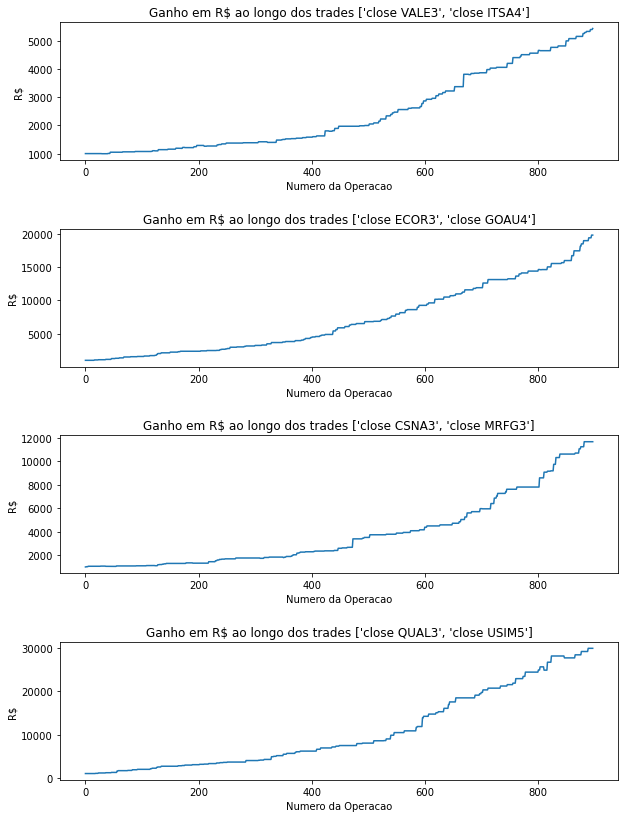

In [6]:
fig = plt.figure(figsize=(10, 25))
plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=None, hspace=.5)
contador1 = 1

for k,v in dic_dados_pares.items():
    print(f'{k}: {v.financeiro:.2f}')
    plt.subplot(8, 1, contador1)
    plt.title('Ganho em R$ ao longo dos trades '+ k)
    plt.xlabel('Numero da Operacao')
    plt.ylabel('R$')
    plt.plot(v.l_evolucao)
    contador1 += 1

In [75]:
# fig = plt.figure(figsize=(10, 25))
# plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=None, hspace=.5)
# contador1 = 1
tamanho = len(dic_dados_pares["['close VALE3', 'close ITSA4']"].l_evolucao)
l_carteira_total = [0]*tamanho

for i in range(tamanho):
    l_carteira_total[i] = 0
    for k,v in dic_dados_pares.items():
        l_carteira_total[i] += v.l_evolucao[i]
#     print(f'{k}: {v.financeiro:.2f}')
#     plt.subplot(8, 1, contador1)
#     plt.title('Ganho em R$ ao longo dos trades '+ k)
#     plt.xlabel('Numero da Operacao')
#     plt.ylabel('R$')
#     plt.plot(v.l_evolucao)
#     contador1 += 1

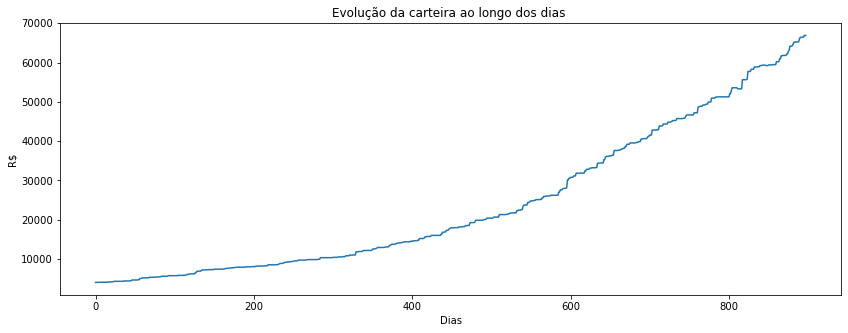

In [81]:
fig = plt.figure(figsize=(14, 5))
plt.title('Evolução da carteira ao longo dos dias ')
plt.xlabel('Dias')
plt.ylabel('R$')
plt.plot(l_carteira_total)
plt.show()